In [1]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import f1_score

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import RobustScaler
import xgboost as xgb

In [5]:
df1 = pd.read_csv('downloads/train_values.csv')
df2 = pd.read_csv('downloads/train_labels.csv')
df = df1.merge(df2, on= 'building_id')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [7]:
df.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [8]:
# df.drop(['legal_ownership_status'], axis = 1,inplace=True)

In [9]:
df.land_surface_condition.unique()

array(['t', 'o', 'n'], dtype=object)

In [10]:
df["land_surface_condition"] = df["land_surface_condition"].map({'t' : 1,'o': 2, 'n': 3})

In [11]:
df.foundation_type.unique()

array(['r', 'w', 'i', 'u', 'h'], dtype=object)

In [12]:
df["foundation_type"] = df["foundation_type"].map({'r' : 1,'w': 2, 'i': 3, 'u': 4, 'h':5})

In [13]:
df.roof_type.unique()

array(['n', 'q', 'x'], dtype=object)

In [14]:
df["roof_type"] = df["roof_type"].map({'n' : 1,'q': 2, 'x': 3})

In [15]:
df.ground_floor_type.unique()

array(['f', 'x', 'v', 'z', 'm'], dtype=object)

In [16]:
df["ground_floor_type"] = df["ground_floor_type"].map({'f' : 1,'x': 2, 'v': 3, 'z': 4, 'm':5})

In [17]:
df.other_floor_type.unique()

array(['q', 'x', 'j', 's'], dtype=object)

In [18]:
df["other_floor_type"] = df["other_floor_type"].map({'q' : 1,'x': 2, 'j': 3, 's': 4})

In [19]:
df["plan_configuration"] = df["plan_configuration"].map({'a' : 1,'c': 2, 'd': 3, 'f': 4, 'm': 5, 'n': 6, 'o': 7, 'q': 8, 's': 9, 'u': 10})

In [20]:
df["position"] = df["position"].map({'j' : 1,'o': 2, 's': 3, 't': 4})

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  int64 
 9   foundation_type                         260601 non-null  int64 
 10  roof_type                               260601 non-null 

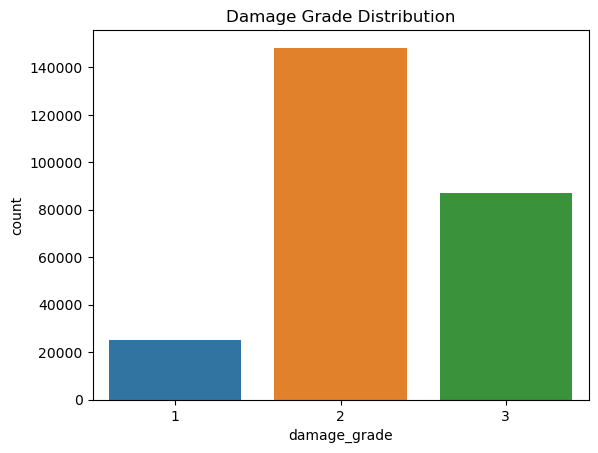

In [22]:
sn.countplot(x="damage_grade", data=df)
plt.title("Damage Grade Distribution")
plt.show()

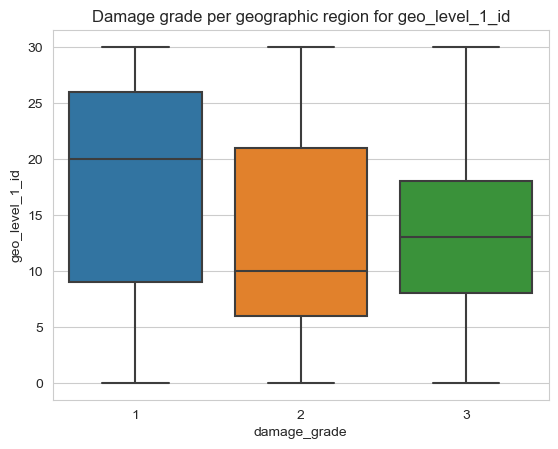

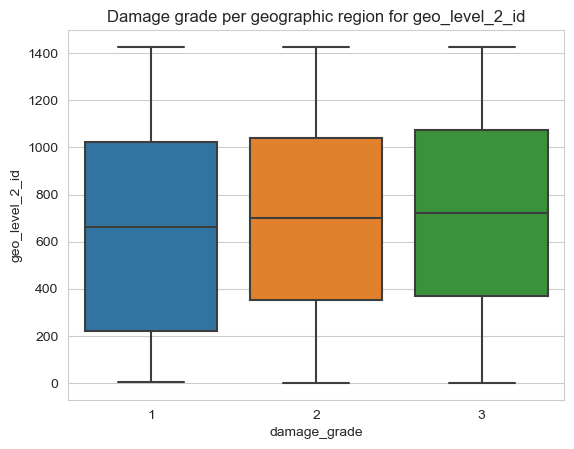

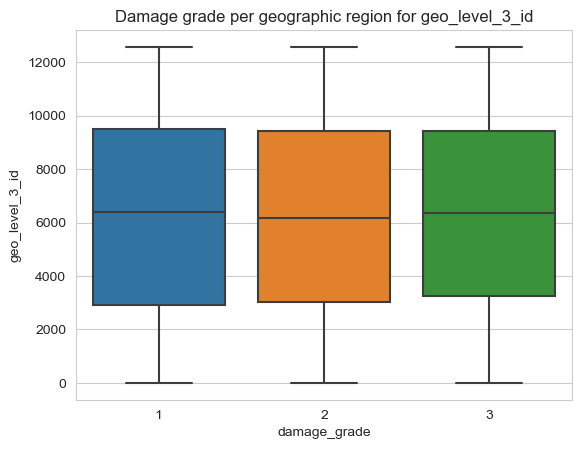

In [23]:
def plot_box(df, cols, col_x='damage_grade'):
    for col in cols:
        sn.set_style("whitegrid")
        sn.boxplot(x=col_x, y=col, data=df)
        plt.xlabel(col_x)  # Set text for the x axis
        plt.ylabel(col)  # Set text for y axis
        plt.title('Damage grade per geographic region for ' + str(col))
        plt.show()

num_cols = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id']
plot_box(df, num_cols)

/var/folders/bp/9n9bh4mn37b4q0c5dvr_b6kr0000gn/T/ipykernel_71997/1764295732.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df[col], bins=bins, rug=True, hist=hist)


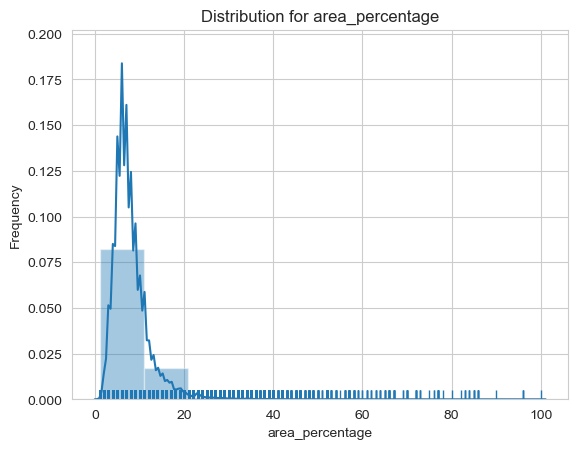

/var/folders/bp/9n9bh4mn37b4q0c5dvr_b6kr0000gn/T/ipykernel_71997/1764295732.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df[col], bins=bins, rug=True, hist=hist)


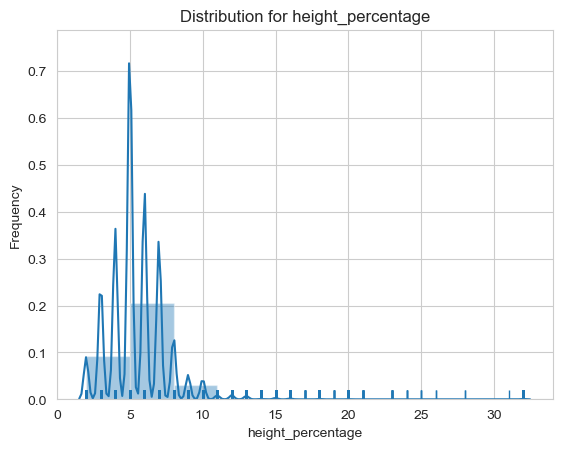

In [24]:
column=['area_percentage', 'height_percentage']
def distplot(df, column, bins = 10, hist = False):
    for col in column:
        sn.distplot(df[col], bins=bins, rug=True, hist=hist)
        plt.title('Distribution for ' + col)
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

distplot(df, column, hist= True)

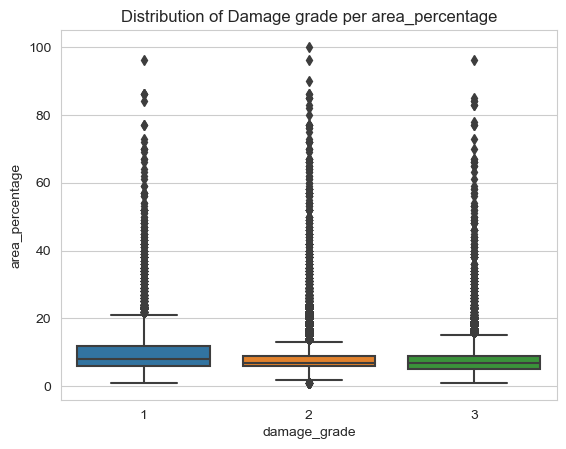

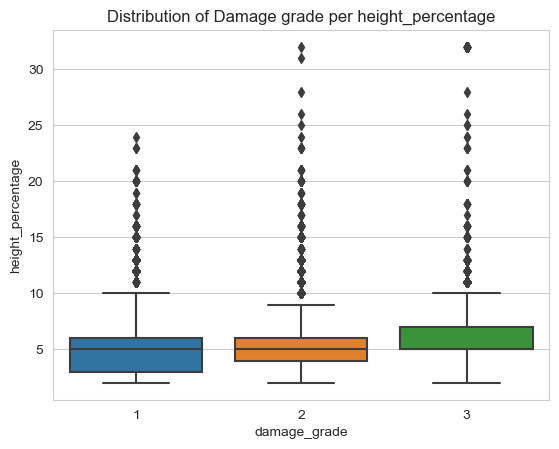

In [25]:
def plot_box(df, cols, col_x = 'damage_grade'):
    for col in cols:
        sn.set_style("whitegrid")
        sn.boxplot(x= col_x, y=col, data=df)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.title('Distribution of Damage grade per ' + str(col))
        plt.show()
        

num_cols = ['area_percentage', 'height_percentage']
plot_box(df, num_cols)

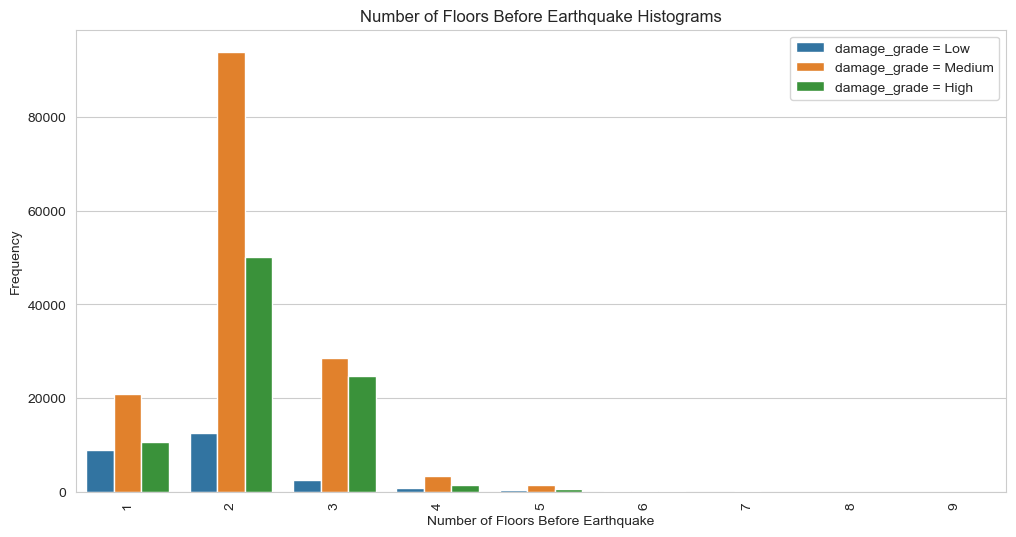

In [26]:
plt.figure(figsize=(12, 6))
sn.countplot(x=df["count_floors_pre_eq"], hue=df["damage_grade"])
plt.ylabel("Frequency")
plt.xlabel("Number of Floors Before Earthquake")
plt.xticks(rotation=90)
plt.title("Number of Floors Before Earthquake Histograms")
plt.legend(["damage_grade = Low", "damage_grade = Medium", "damage_grade = High"])
plt.show()

<Axes: title={'center': 'Damage distribution of buildings with less than 50 years old'}, xlabel='age', ylabel='count'>

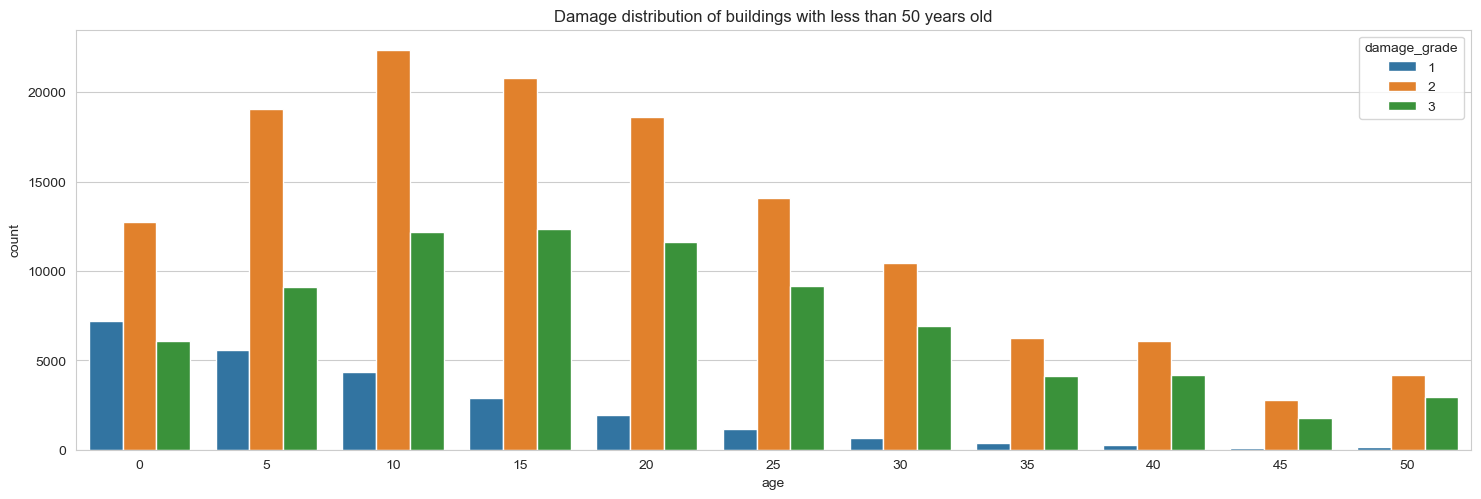

In [27]:
plt.figure(figsize=(18,12))
plt.subplot(211)
plt.title('Damage distribution of buildings with less than 50 years old')
tr=df[df['age']<=50]
sn.countplot(x='age',data=tr,hue='damage_grade')

<Axes: title={'center': 'Damage distribution of buildings between the age of 51 and 100 years old'}, xlabel='age', ylabel='count'>

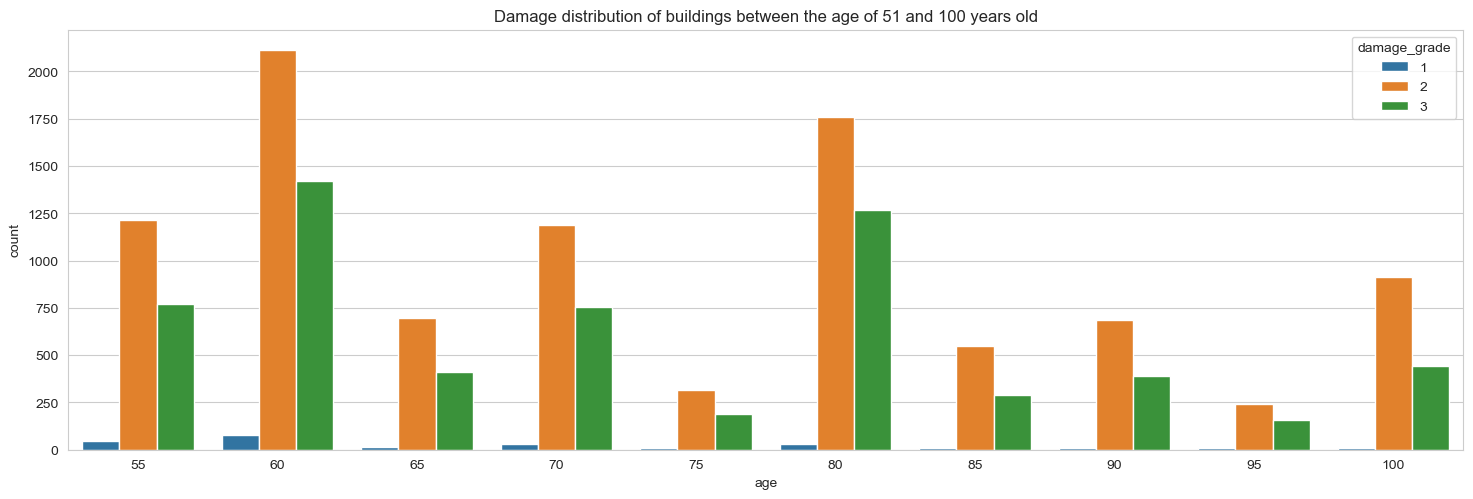

In [28]:
plt.figure(figsize=(18,12))
plt.subplot(211)
plt.title('Damage distribution of buildings between the age of 51 and 100 years old')
tr = df.loc[(df['age'] > 50) & (df['age']<=100)]
sn.countplot(x='age',data=tr,hue='damage_grade')

<Axes: title={'center': 'Damage distribution of buildings between the age of 101 and 150 years old'}, xlabel='age', ylabel='count'>

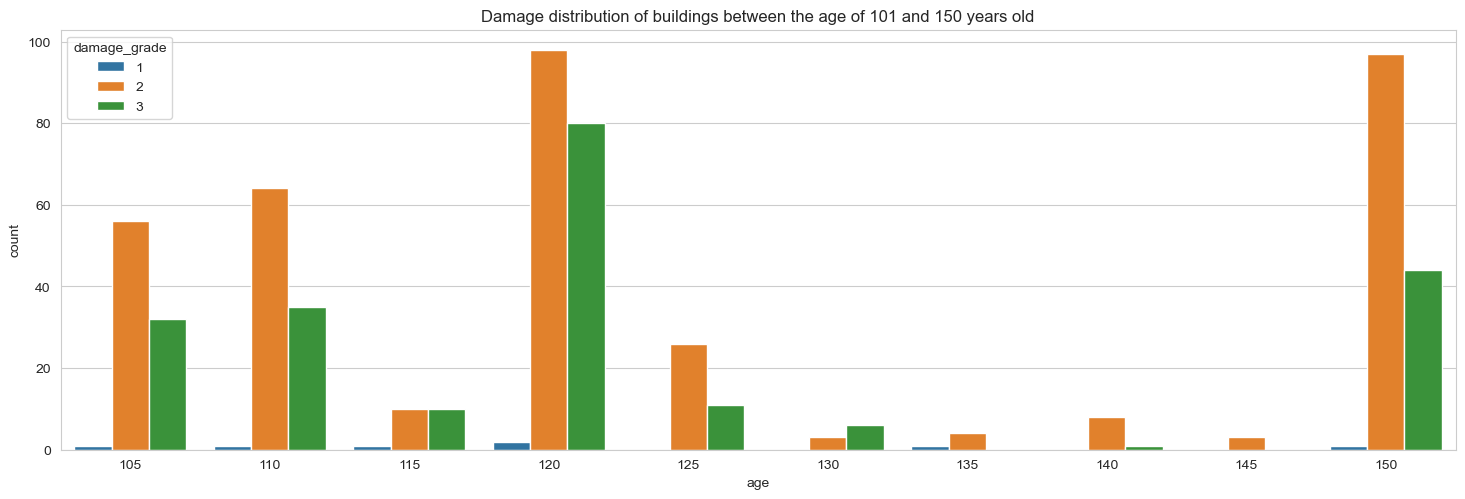

In [29]:
plt.figure(figsize=(18,12))
plt.subplot(211)
plt.title('Damage distribution of buildings between the age of 101 and 150 years old')
tr = df.loc[(df['age'] > 100) & (df['age']<=150)]
sn.countplot(x='age',data=tr,hue='damage_grade')

<Axes: title={'center': 'Damage distribution of buildings greater than 150 years old'}, xlabel='age', ylabel='count'>

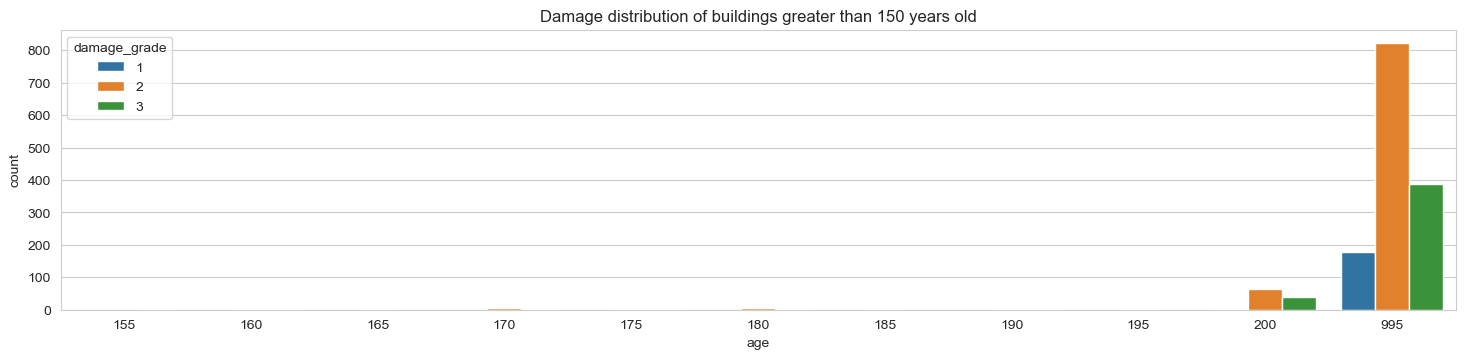

In [30]:
plt.figure(figsize=(18,8))
plt.subplot(211)
plt.title('Damage distribution of buildings greater than 150 years old')
tr=df[df['age']>150]
sn.countplot(x='age',data=tr,hue='damage_grade')

In [31]:
# for data, row in df.iterrows():
#     if row.age <= 50:
#         df.loc[data, 'age'] = '<50'
#     elif row.age > 50 and row.age <= 100:
#         df.loc[data, 'age'] = '51-100'
#     elif row.age > 100 and row.age <= 150:
#         df.loc[data, 'age'] = '100-150'
#     elif row.age > 150 :
#         df.loc[data, 'age'] = '>150'

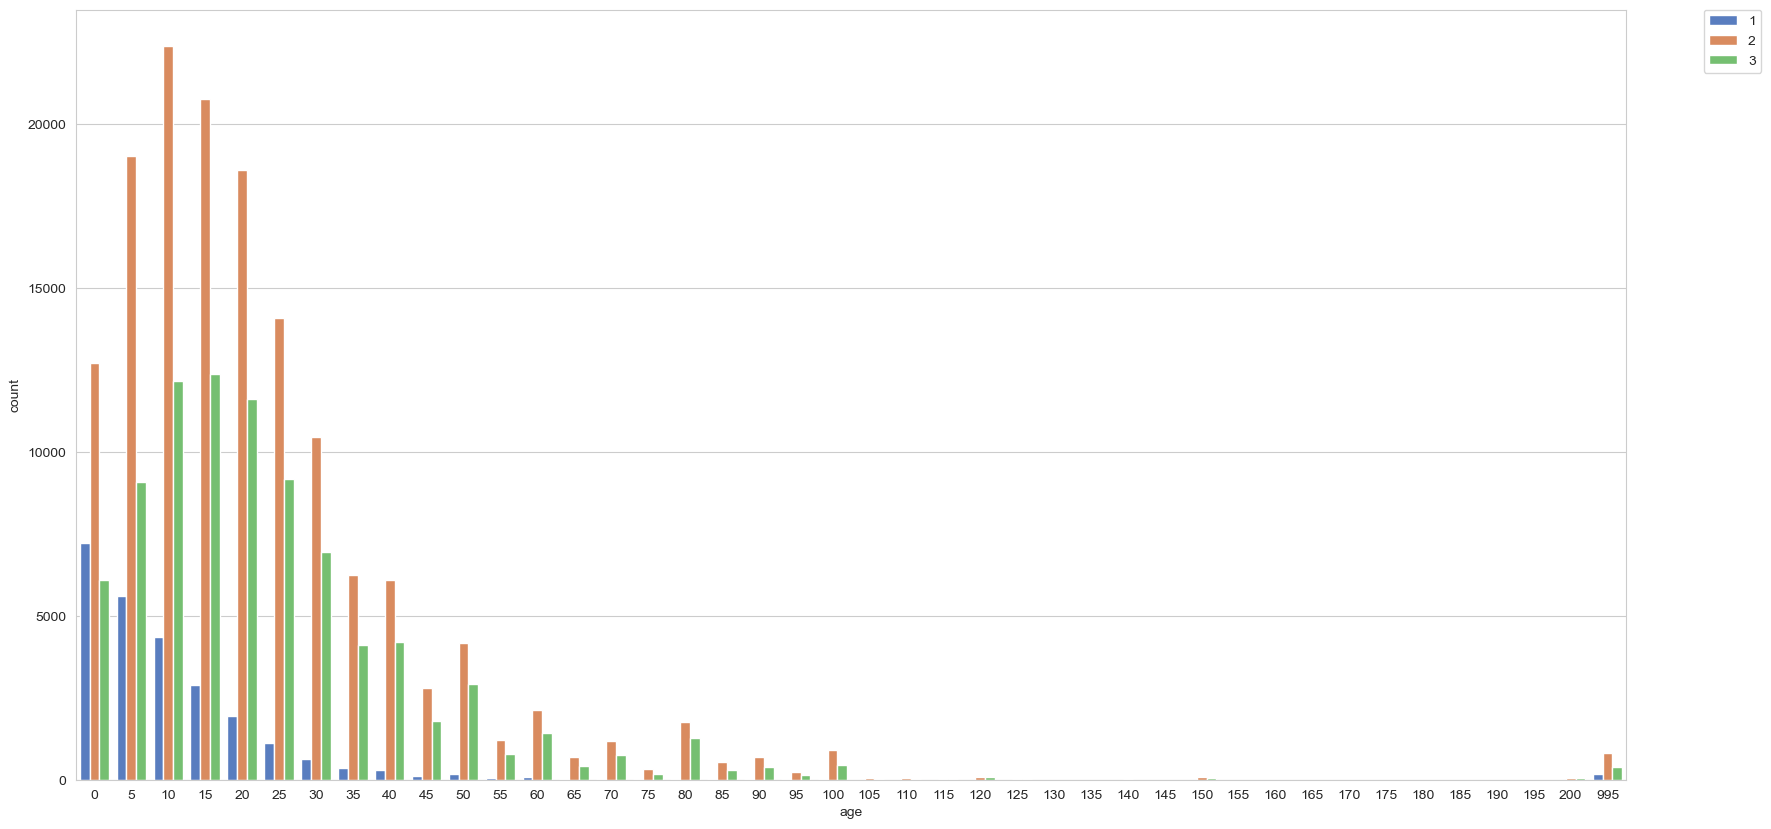

In [32]:
plt.figure(figsize=(20,10))
ax = sn.countplot(x="age", hue="damage_grade", palette="muted",data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

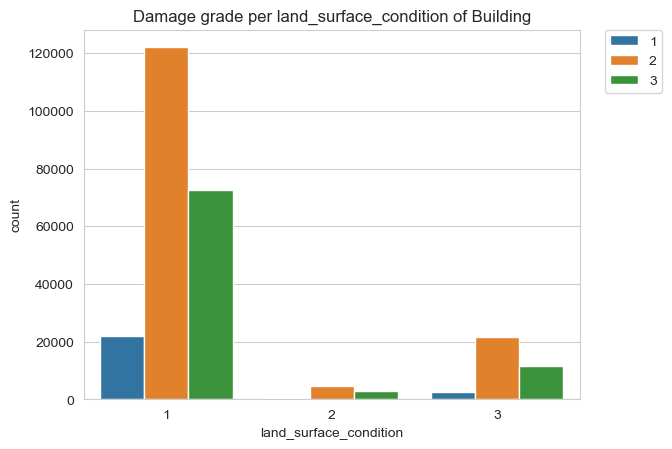

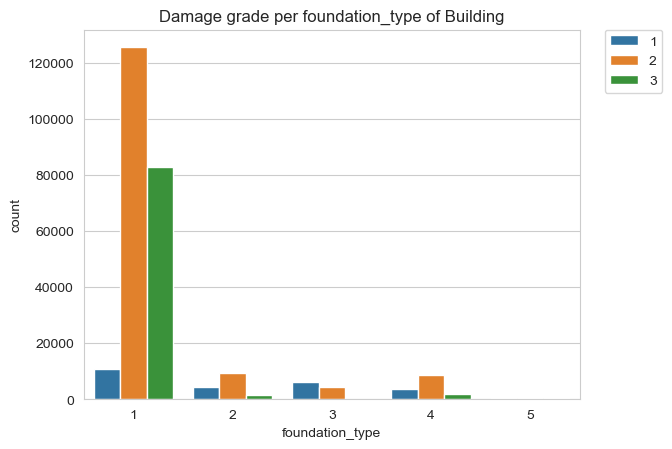

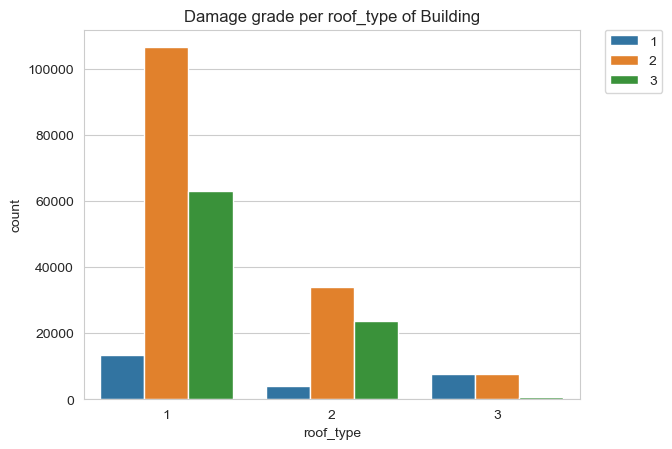

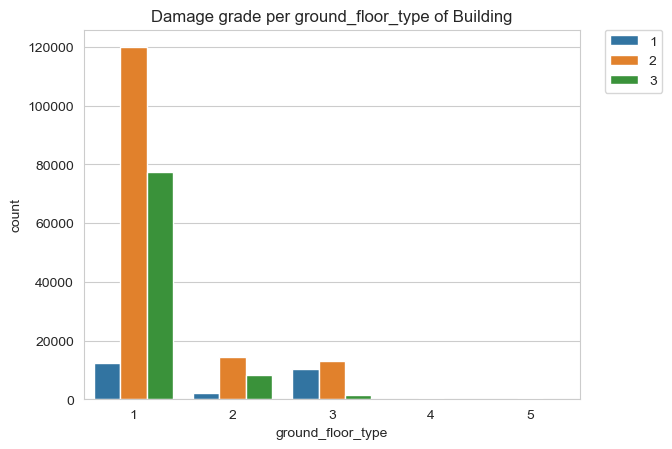

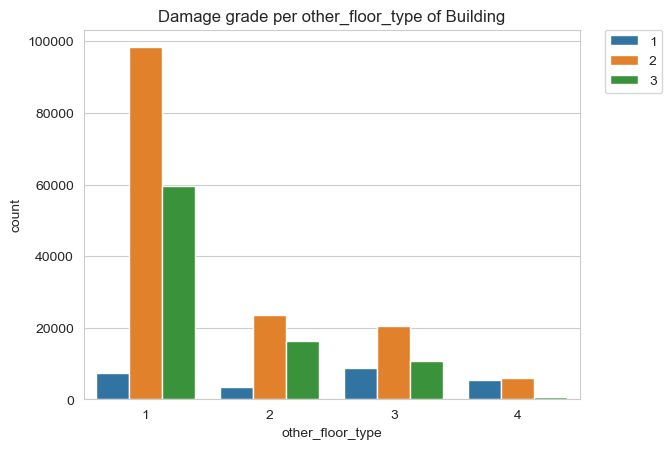

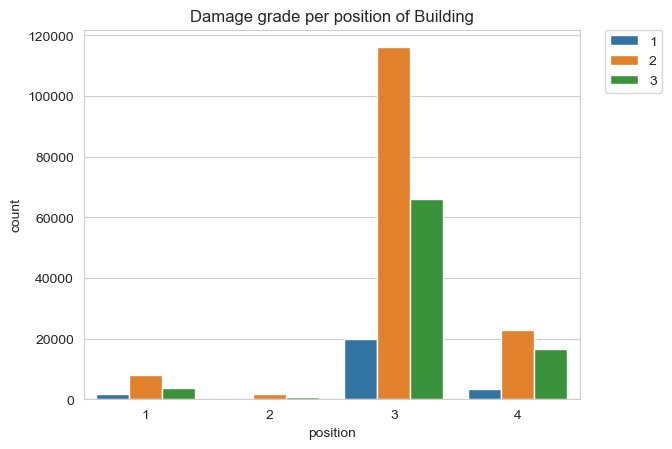

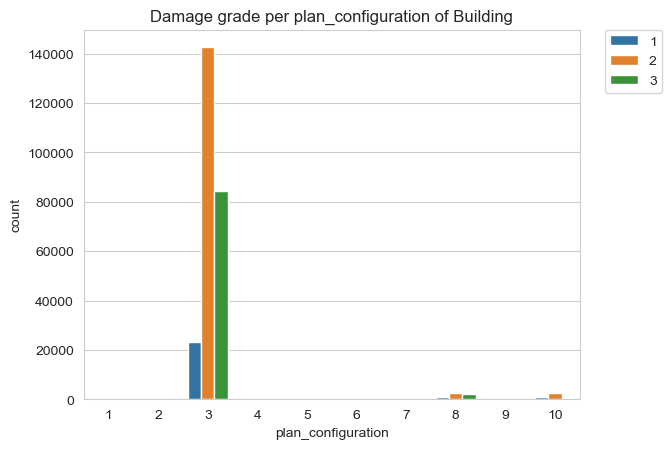

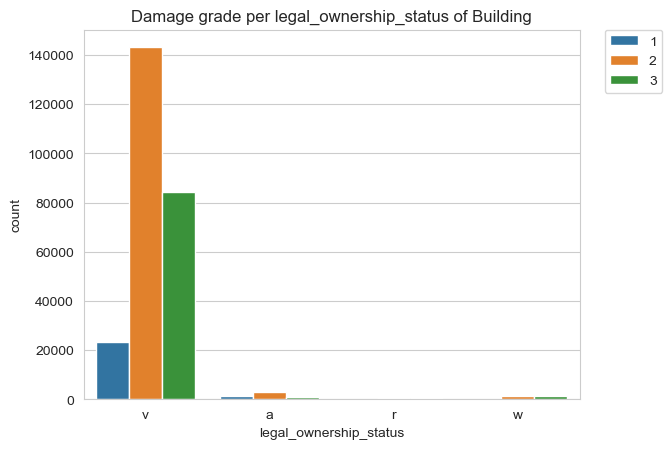

In [33]:
def plot_box(df, cols, col_x = 'damage_grade'):
    for  col in (cols):
    #for col in cols:
        sn.set_style("whitegrid")
        sn.countplot(hue=col_x, x=col, data=df)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('count')# Set text for y axis
        plt.title('Damage grade per ' + str(col)+' of Building')
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()
        

cat_cols = ['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status']
plot_box(df, cat_cols)

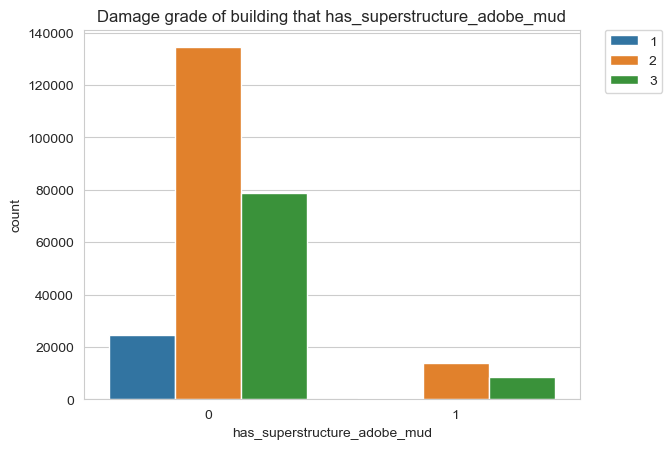

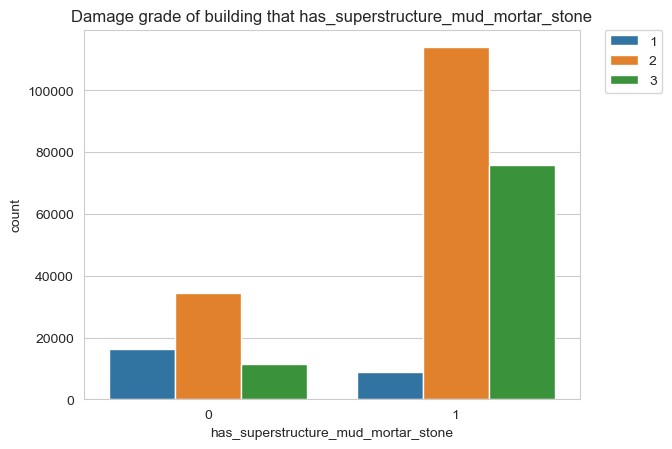

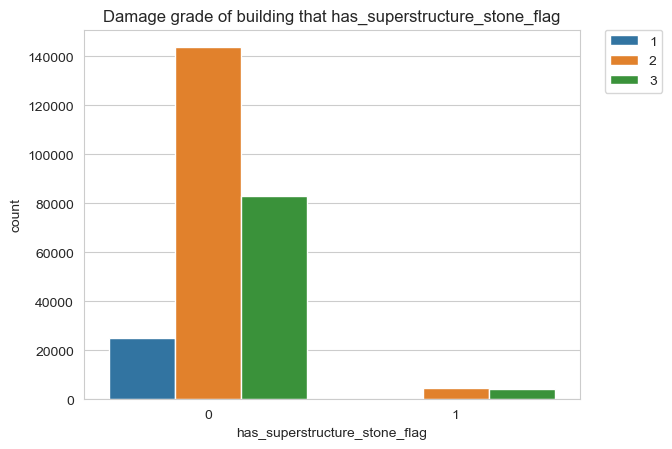

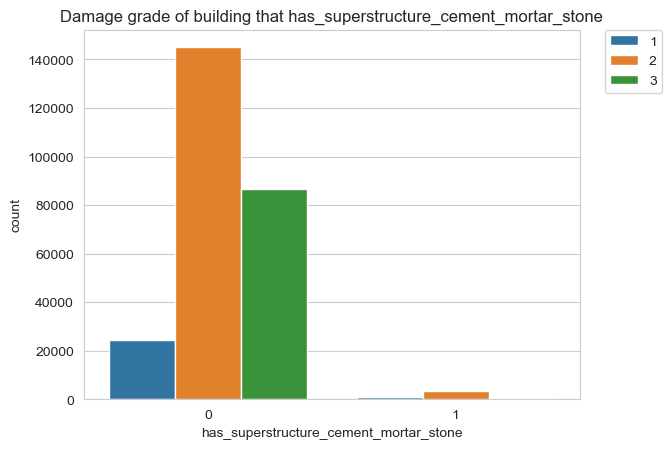

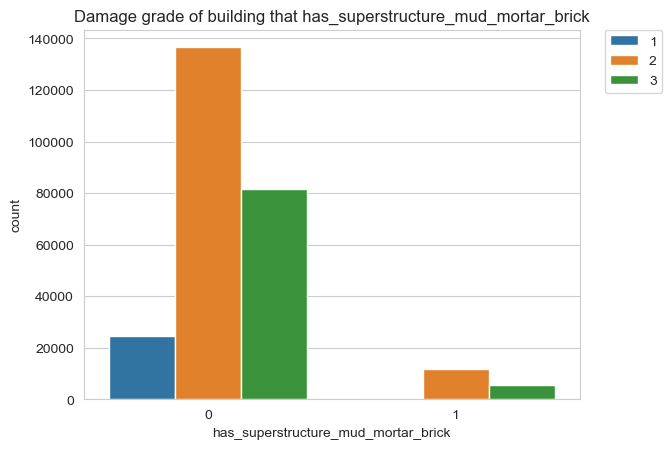

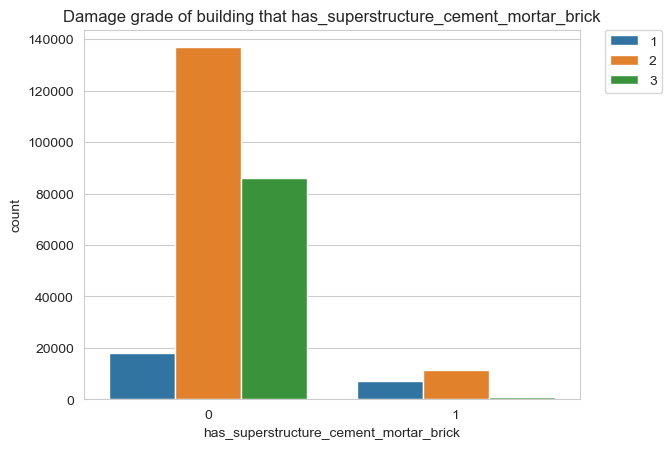

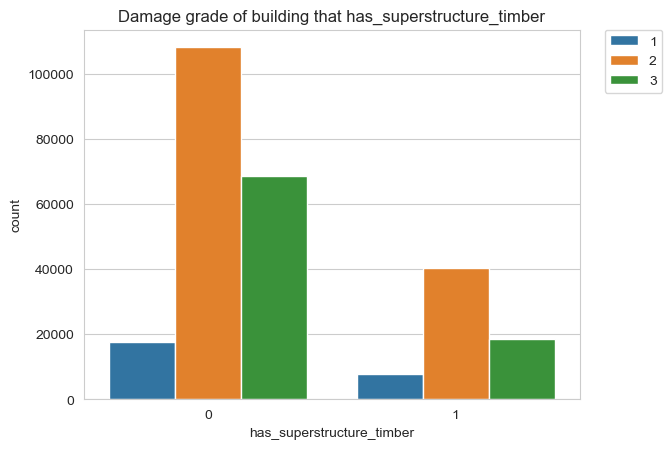

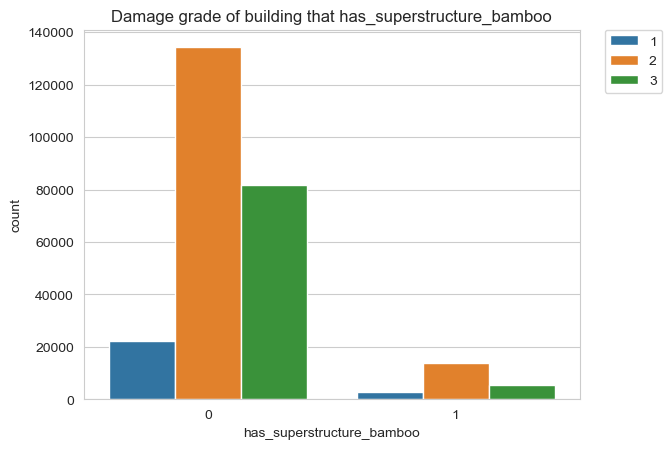

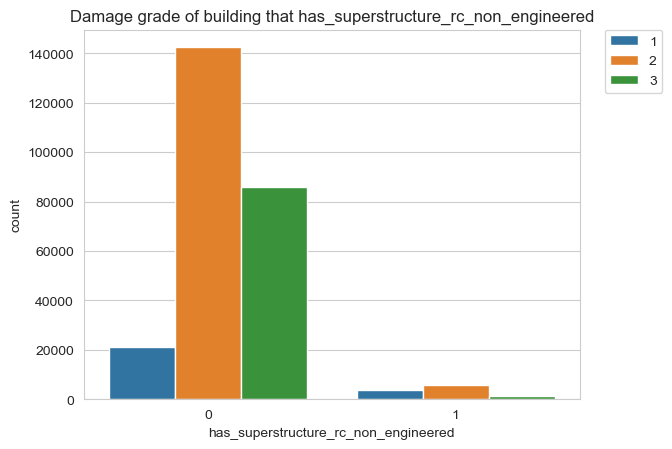

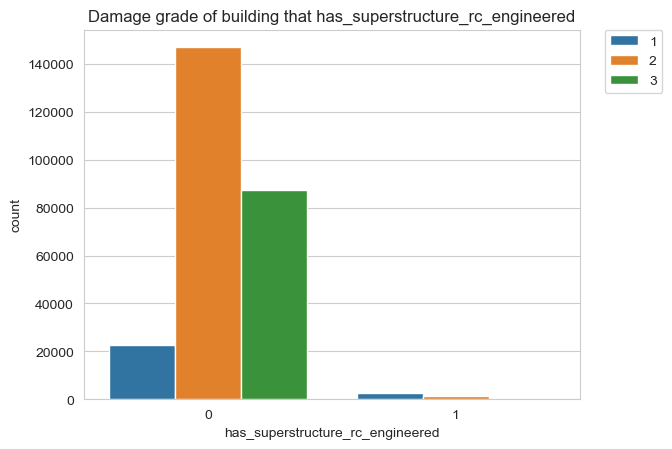

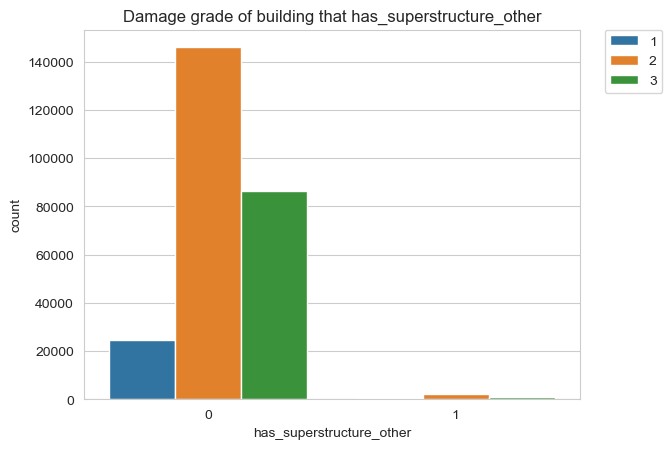

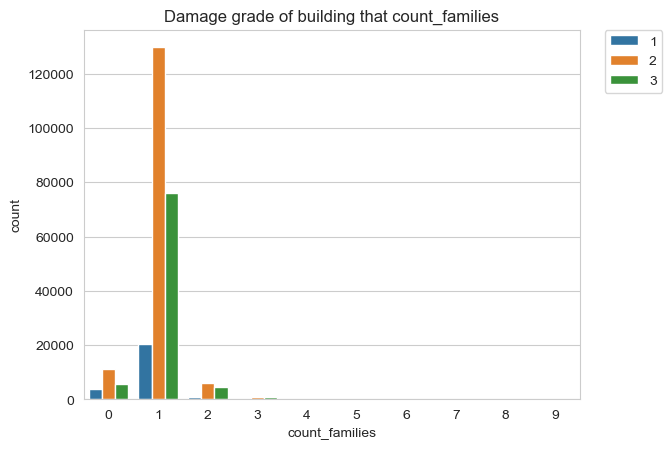

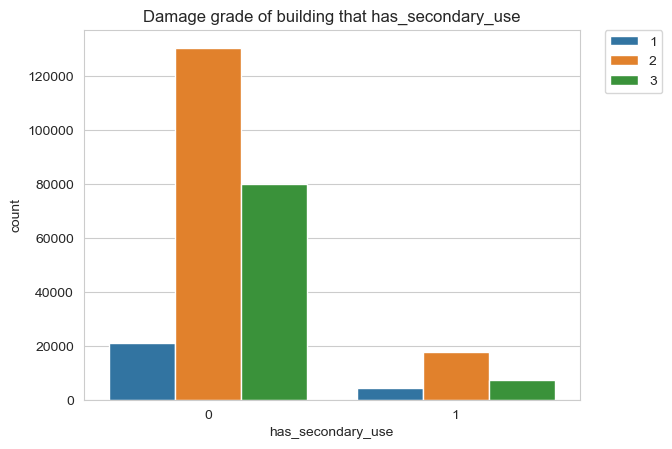

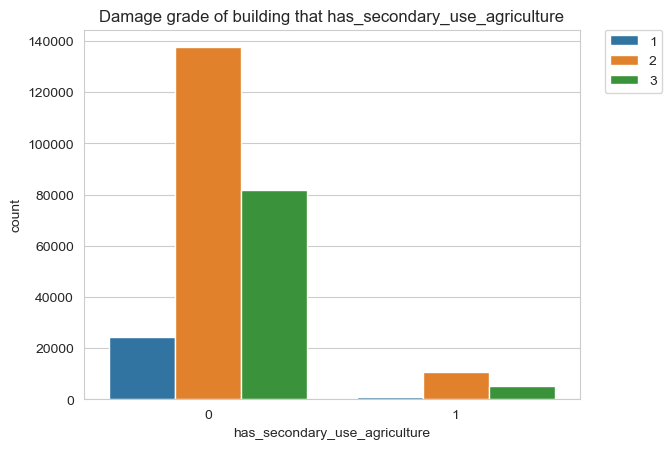

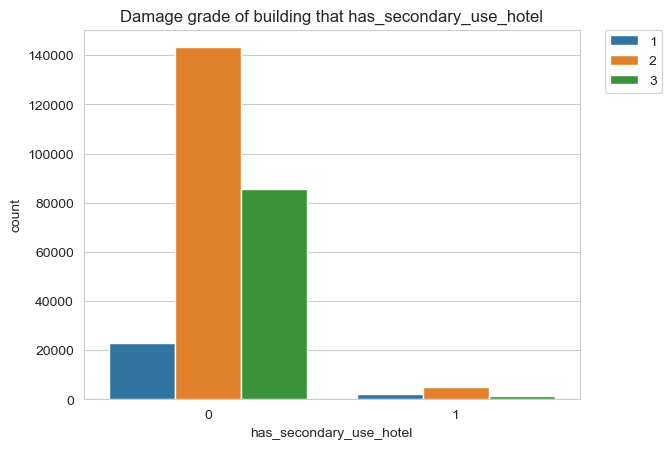

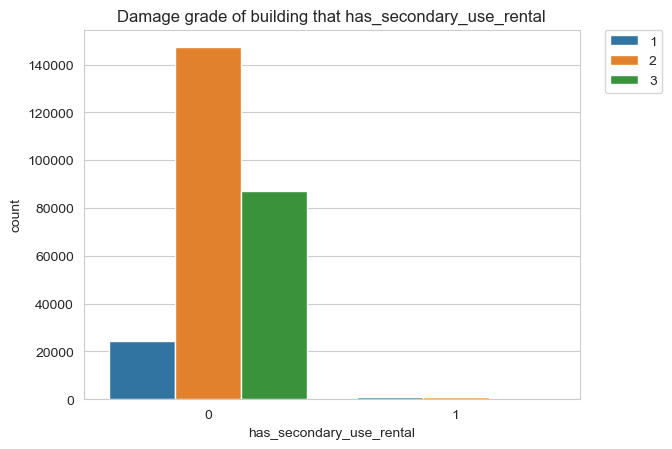

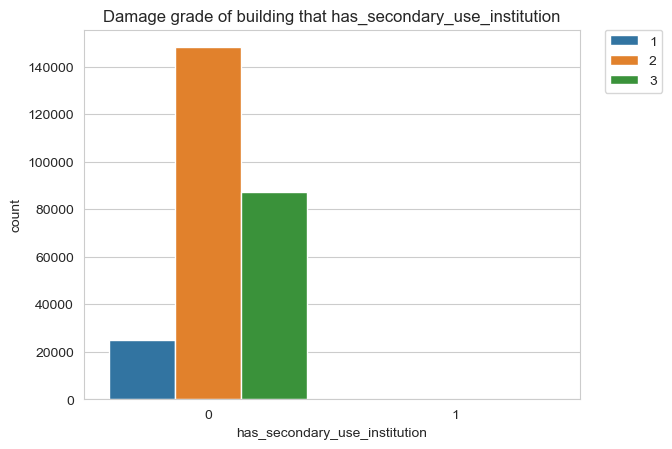

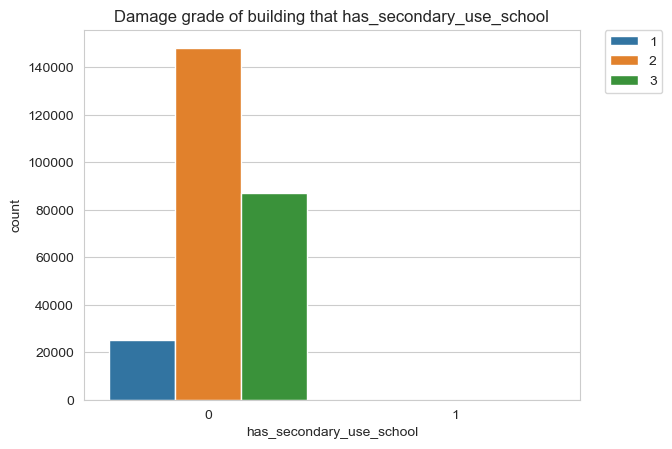

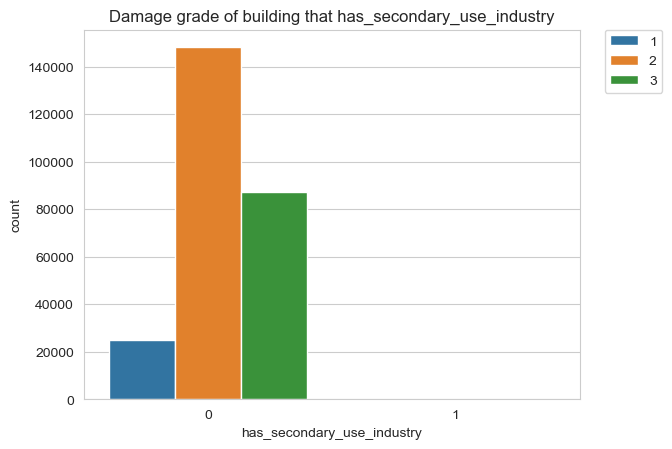

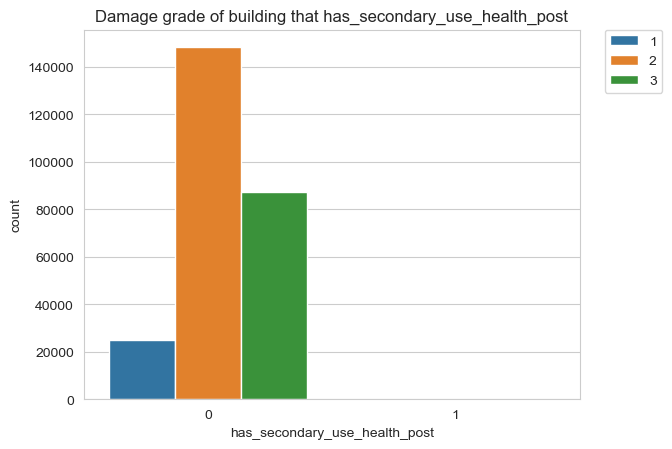

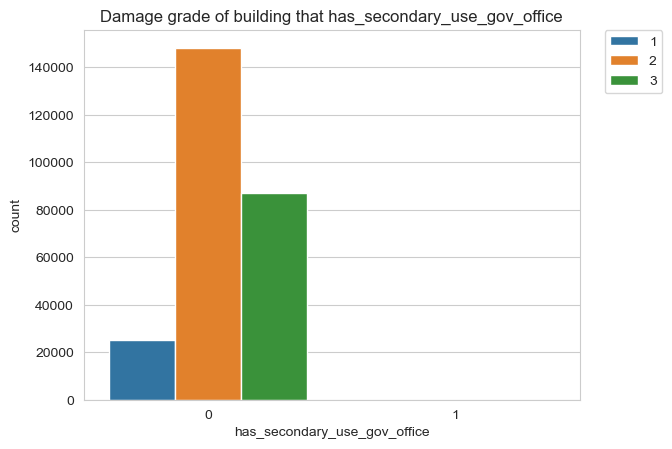

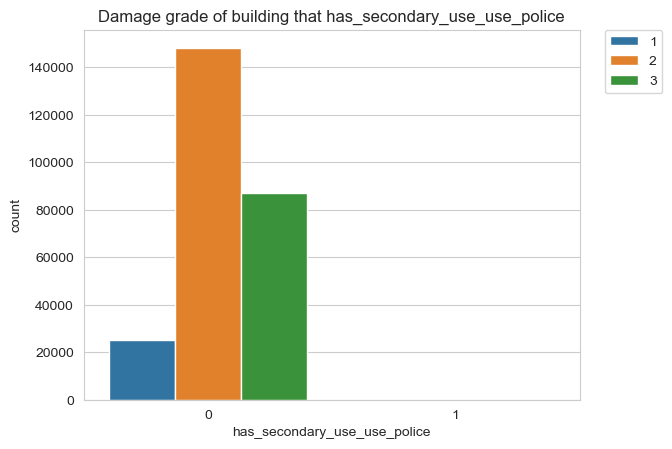

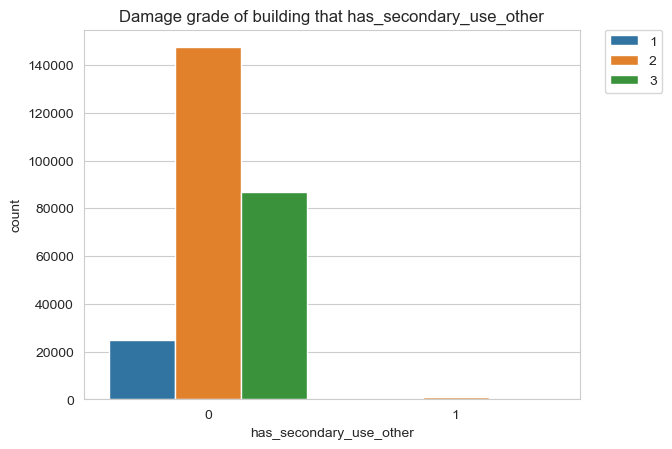

In [34]:
def plot_box(df, cols, col_x = 'damage_grade'):
    for col in cols:
        sn.set_style("whitegrid")
        sn.countplot(hue=col_x, x=col, data=df)
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('count')# Set text for y axis
        plt.title('Damage grade of building that ' + str(col))
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()
        

cat_num_cols = ['has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag',
                             'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick',
                             'has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered',
                             'has_superstructure_rc_engineered','has_superstructure_other','count_families','has_secondary_use',
                             'has_secondary_use_agriculture','has_secondary_use_hotel','has_secondary_use_rental','has_secondary_use_institution',
                             'has_secondary_use_school','has_secondary_use_industry','has_secondary_use_health_post',
                             'has_secondary_use_gov_office','has_secondary_use_use_police','has_secondary_use_other']
plot_box(df, cat_num_cols)

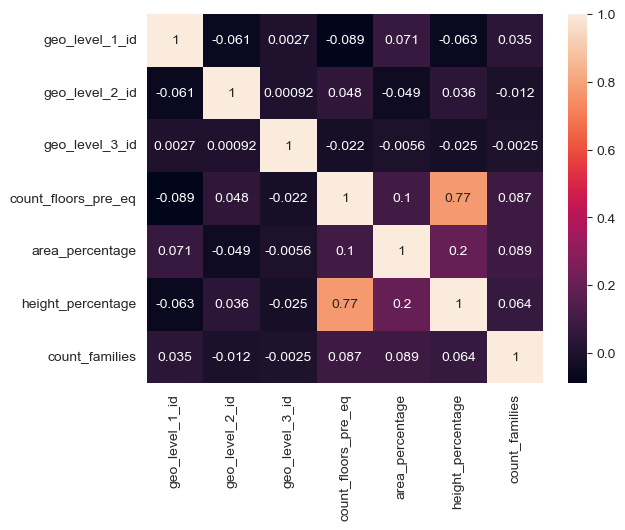

In [35]:
selected_columns = df[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'area_percentage',
                      'height_percentage','count_families']]
c_matrix = selected_columns.corr()
sn.heatmap(c_matrix, annot=True)
plt.show()

# damage_corr = c_matrix['damage_grade']
# high_corr_vars = damage_corr[damage_corr.abs() >0.1]
# high_corr_vars = high_corr_vars[high_corr_vars.index != 'damage_grade']

# print(high_corr_vars)

In [36]:
df.drop(['legal_ownership_status'], axis = 1,inplace=True)

In [37]:
X_train = df.drop(columns=["damage_grade"])
Y_train = df["damage_grade"]

In [38]:
# selector = SelectKBest(score_func=chi2, k='all')
# selector.fit(X_train, Y_train)
# selected_features = X_train.columns[selector.get_support()]
# print(selected_features)
# model = LogisticIT()
# model.fit(X_train[selected_features], Y_train)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   building_id                             260601 non-null  int64
 1   geo_level_1_id                          260601 non-null  int64
 2   geo_level_2_id                          260601 non-null  int64
 3   geo_level_3_id                          260601 non-null  int64
 4   count_floors_pre_eq                     260601 non-null  int64
 5   age                                     260601 non-null  int64
 6   area_percentage                         260601 non-null  int64
 7   height_percentage                       260601 non-null  int64
 8   land_surface_condition                  260601 non-null  int64
 9   foundation_type                         260601 non-null  int64
 10  roof_type                               260601 non-null  int64
 11  

In [40]:
model = RandomForestRegressor()
model.fit(X_train, Y_train)

# Get feature importances from the model
importances = model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort features by importance
sorted_indices = importances.argsort()[::-1]

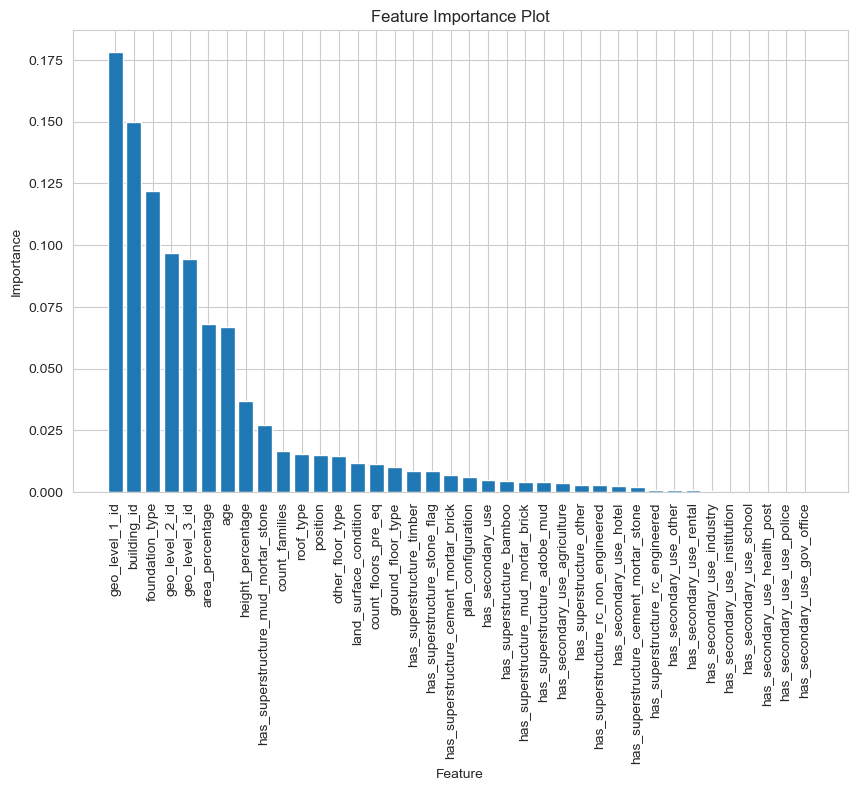

In [41]:
# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices])
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance Plot")
plt.show()

In [42]:
df.drop(['has_secondary_use_other','has_secondary_use_use_police', 'has_secondary_use_gov_office', 'has_secondary_use_health_post', 'has_secondary_use_industry','has_secondary_use_school', 'has_secondary_use_institution','has_secondary_use_rental','has_secondary_use_hotel','has_secondary_use_agriculture','has_secondary_use','has_superstructure_rc_engineered','has_superstructure_cement_mortar_stone','has_superstructure_rc_non_engineered',
         'has_superstructure_other','has_superstructure_adobe_mud','has_superstructure_mud_mortar_brick','has_superstructure_bamboo','has_superstructure_cement_mortar_brick','plan_configuration','has_superstructure_stone_flag','count_floors_pre_eq','has_superstructure_timber'], axis = 1,inplace=True)

In [43]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,has_superstructure_mud_mortar_stone,count_families,damage_grade
0,802906,6,487,12198,30,6,5,1,1,1,1,1,4,1,1,3
1,28830,8,900,2812,10,8,7,2,1,1,2,1,3,1,1,2
2,94947,21,363,8973,10,5,5,1,1,1,1,2,4,1,1,3
3,590882,22,418,10694,10,6,5,1,1,1,1,2,3,1,1,2
4,201944,11,131,1488,30,8,9,1,1,1,1,2,3,0,1,3


In [44]:
columns_to_normalize = [
    'building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
    'age', 'area_percentage', 'height_percentage', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type',
    'other_floor_type', 'position', 'has_superstructure_mud_mortar_stone', 'count_families']

# Normalize the selected columns
df[columns_to_normalize] = df[columns_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [45]:
df.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,has_superstructure_mud_mortar_stone,count_families,damage_grade
count,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,0.499246,0.463345,0.491293,0.497961,0.026668,0.070889,0.114479,0.152286,0.081396,0.180241,0.075889,0.203655,0.684573,0.761935,0.109328,2.238272
std,0.289236,0.267787,0.289216,0.290154,0.073936,0.044366,0.063947,0.348020,0.208532,0.297798,0.167082,0.301919,0.203999,0.425900,0.046488,0.611814
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.248056,0.233333,0.245270,0.244529,0.010050,0.040404,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,1.000000,0.111111,2.000000
50%,0.499324,0.400000,0.491941,0.498926,0.015075,0.060606,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,1.000000,0.111111,2.000000
75%,0.750057,0.700000,0.735809,0.748946,0.030151,0.080808,0.133333,0.000000,0.000000,0.500000,0.000000,0.333333,0.666667,1.000000,0.111111,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [46]:
X = df.drop(columns=["damage_grade"])
Y = df["damage_grade"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 200)

In [47]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [48]:
scores = cross_val_score(nb, X_test, Y_test, cv=10)
# print('Scores:', scores)
print("Naive Bayes score: ",nb.score(X_test, Y_test))
print('Accuracy:', scores.mean()*100)

Naive Bayes score:  0.4384029469887377
Accuracy: 44.13193321378059


In [49]:
# Make predictions on the test set
Y_pred = nb.predict(X_test)

# Calculate the F1 score
f1 = f1_score(Y_test, Y_pred, average='weighted')

# print("Naive Bayes score: ",nb.score(X_test, Y_test))
# print('Accuracy:', scores.mean()*100)
print('F1 Score:', f1)

F1 Score: 0.41379858266737474


In [50]:
# classifier = SVC(kernel = 'linear', random_state = 0)

In [51]:
# classifier.fit(X_train, Y_train)

In [52]:
# # Make predictions on the test data
# y_pred = classifier.predict(X_test)

In [53]:
# # Evaluate the model
# accuracy = accuracy_score(Y_test, y_pred)
# # confusion = confusion_matrix(Y_test, y_pred)
# # report = classification_report(Y_test, y_pred)

# # Print the results
# print(f"Accuracy: {accuracy:.2f}")
# # print("Classification Report:")
# # print(report)

In [54]:
from imblearn.pipeline import make_pipeline as imb_make_pipeline
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestClassifier() 
pip_smote = imb_make_pipeline(RobustScaler(),
                              SMOTE(),
                              rf_clf)
scores = cross_val_score(pip_smote,
                         X_train, Y_train,
                         scoring="f1_micro", cv=2)
print(scores)

[0.6970165  0.69579816]


In [55]:
Y_train_zero_indexed = Y_train - 1
xg_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=3)  # Assuming 3 classes
pip_smote = imb_make_pipeline(RobustScaler(),
                              SMOTE(),
                              xg_clf)
scores = cross_val_score(pip_smote,
                         X_train, Y_train_zero_indexed,
                         scoring="f1_micro", cv=10)
print(scores)

[0.7133538  0.70783768 0.70663853 0.70826938 0.70726209 0.70707022
 0.70750192 0.7100921  0.70846124 0.70524751]


In [56]:
gbr_clf=GradientBoostingClassifier()
pip_smote = imb_make_pipeline(RobustScaler(),
                              SMOTE(),
                              gbr_clf)
scores = cross_val_score(pip_smote,
                         X_train, Y_train,
                         scoring="f1_micro", cv=10)
print(scores)

[0.65377974 0.64951074 0.65118956 0.65123753 0.64883922 0.65023024
 0.65253262 0.65248465 0.65392364 0.64936685]


In [57]:
log_clf= LogisticRegression()
pip_smote = imb_make_pipeline(RobustScaler(),
                              SMOTE(),
                              log_clf)
scores = cross_val_score(pip_smote,
                         X_train, Y_train,
                         scoring="f1_micro", cv=10)
print(scores)

/Users/primasanghvi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/primasanghvi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

[0.45438411 0.45687836 0.45620683 0.45510361 0.46042786 0.45615886
 0.45817345 0.45548734 0.45745395 0.45802955]


/Users/primasanghvi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
